# DSC 210 FA24 Group 17 Final Project Experiment Notebook-CPU
## Topic 11: Libraries and Tools
### **Benchmarking Matrix Multiplication Performance Across Python Tools and Libraries with CPU and GPU**

##### **Contributors**: Doting Cai, Kaiming Tao, Zhihan Li

## **Setup**

Import libraries necessary for the following experiment.

In [1]:
import time
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Prepare Dataset of Matrices of Different Sizes**

In [2]:
def generate_square_matrix(size):
    # Set the random seed to ensure consistent results
    np.random.seed(42)

    return np.random.rand(size, size).astype(np.float32)

## **Runtime Measurement Function for Different Operation Approaches**

### **The Naive Algorithm for Matrix Multiplication**

In [3]:
def naive_matrix_multiply(A, B):
    """
    Measures the one-time runtime of matrix multiplication by the naive algorithm.

    Parameters:
        A: matrix
        B: another matrix

    Returns:
        runtime: The time taken to execute the function (in seconds).
    """
    start_time = time.perf_counter()  # Record the start time

    # Get the size of the matrix (assume square matrices)
    n = len(A)

    # Initialize the result matrix with zeros
    C = [[0 for _ in range(n)] for _ in range(n)]

    # Perform the multiplication
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]

    end_time = time.perf_counter()  # Record the end time

    return end_time - start_time

### **Numpy Matrix Multiplication**

In [4]:
def numpy_matrix_multiply(A, B):
    """
    Measures the one-time runtime of matrix multiplication by the Numpy method.

    Parameters:
        A: matrix
        B: another matrix

    Returns:
        runtime: The time taken to execute the function (in seconds).
    """
    start_time = time.perf_counter()  # Record the start time

    C = A @ B

    end_time = time.perf_counter()  # Record the end time

    return end_time - start_time

### **SOTA: Pytorch Matrix Multiplication with GPU**

In [5]:
def pytorch_matrix_multiply(A, B):
    """
    Measures the one-time runtime of matrix multiplication by the pytorch .mm method based on whether GPU is available.

    Parameters:
        A: matrix
        B: another matrix

    Returns:
        runtime: The time taken to execute the function (in seconds).
    """
    A = torch.from_numpy(A).to(torch.float32)
    B = torch.from_numpy(B).to(torch.float32)

    # If using GPU
    if torch.cuda.is_available():
      # move tensor to GPU
      A = A.to('cuda')
      B = B.to('cuda')

      start_time = time.perf_counter() # Record the start time

      C = torch.mm(A, B)

      end_time = time.perf_counter() # Record the end time
      return end_time - start_time

    # If not using GPU (when using CPU)
    else:
      start_time = time.perf_counter()  # Record the start time

      C = torch.mm(A, B)

      end_time = time.perf_counter()  # Record the end time

      return end_time - start_time

## **Runtime Measurement Function**

In [6]:
def runtime_of_size_m(test_function, m):
    """
    Measures the runtime of a matrix multiplication of two m*m matrices by the target function .

    Parameters:
        test_function: the method/library for matrix multiplication
        m: the size of the matrix
        n: the number of runs

    Returns:
        B: another matrix

    Returns:
        runtime: The time taken for the target function to compute matrix multiplication of two m*m matrices (in milliseconds).
    """
    A = generate_square_matrix(m)
    B = generate_square_matrix(m)

    runtime = test_function(A, B)

    return round(runtime * 1000, 3)

## **Runtime Measurement Experiment Function**

In [7]:
def benchmark_experiment():
  # set up the experiment with a list of functions and a list of matrix sizes
  funcs = [
      naive_matrix_multiply,
      numpy_matrix_multiply,
      pytorch_matrix_multiply
  ]

  matrix_sizes = [
      2**1,
      2**2,
      2**3,
      2**4,
      2**5,
      2**6,
      2**7,
      2**8,
      2**9,
      2**10,
      2**11,
      2**12,
      2**13,
      2**14
  ]

  # create an empty list to store data
  data = []

  # collection and record the runtime for each experiment into the data list
  for func in funcs:
    func_name = func.__name__
    for matrix_size in matrix_sizes:
      # we stop collecting data for naive approach after matrix length of 2**7 to avoid extremely long runtime
      if func_name == 'naive_matrix_multiply':
        if matrix_size >= 2**8:
          break
      runtime = runtime_of_size_m(func, matrix_size)
      data.append([func_name, matrix_size, runtime])

  # define column names for the dataframe
  columns=['function', 'matrix size', 'runtime(ms)']

  # Convert data to DataFrame with specified column names
  df = pd.DataFrame(data, columns=columns)

   # change function names
  df['function'] = df['function'].replace({
      'naive_matrix_multiply': 'CPU: Naive',
      'numpy_matrix_multiply': 'CPU: Numpy',
      'pytorch_matrix_multiply': 'CPU: Pytorch'
  })


  return df

## **Runtime Measurement Experiment**

In [8]:
# Benchmark the runtime of Naive vs. Numpy vs. Pytorch on matrix multiplication of different matrix sizes with GPU available
benchmark_result = benchmark_experiment()
benchmark_result = benchmark_experiment() # use the results from the second run, as the first run is still setting up the environment
benchmark_result

,function,matrix size,runtime(ms)
0,CPU: Naive,2,0.045
1,CPU: Naive,4,0.089
2,CPU: Naive,8,0.556
3,CPU: Naive,16,3.781
4,CPU: Naive,32,41.160
5,CPU: Naive,64,222.657
6,CPU: Naive,128,1781.609
7,CPU: Numpy,2,0.037
8,CPU: Numpy,4,0.008
9,CPU: Numpy,8,0.007



### **Figure I, All Approaches (Naive up to matrix size 2^7, others up to 2^12)**

In [9]:
figure_1_df = benchmark_result[benchmark_result['matrix size'] <= 2**12]

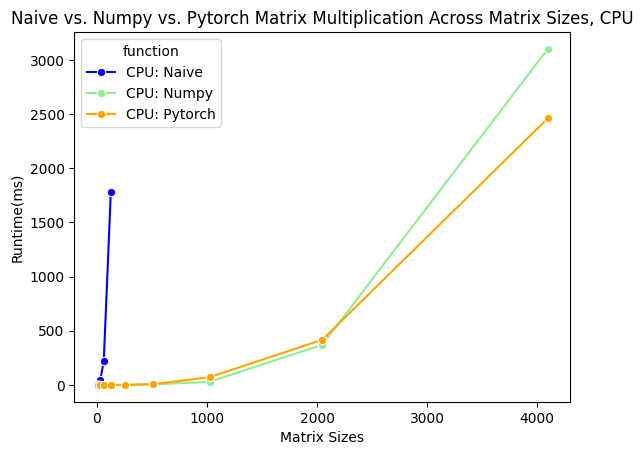

In [11]:
# Define custom colors for each hue
custom_palette = {
    'CPU: Naive': 'blue',
    'CPU: Numpy': 'lightgreen',
    'CPU: Pytorch': 'orange'
}

# Create the lineplot with hue
sns.lineplot(
    data=figure_1_df,
    x='matrix size',
    y='runtime(ms)',
    hue='function',
    palette=custom_palette,
    marker='o'
)

# Add title and labels
plt.title('Naive vs. Numpy vs. Pytorch Matrix Multiplication Across Matrix Sizes, CPU')
plt.xlabel('Matrix Sizes')
plt.ylabel('Runtime(ms)')

# Show the plot
plt.show()


### **Figure II, Numpy & Pytorch, matrix size up to 2^14**

In [12]:
figure_2_df = benchmark_result[benchmark_result['function'] != 'CPU: Naive']

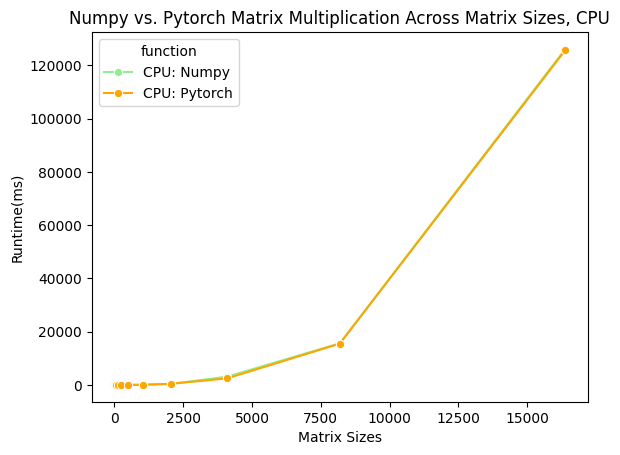

In [13]:
# Define custom colors for each hue
custom_palette = {
    'CPU: Naive': 'blue',
    'CPU: Numpy': 'lightgreen',
    'CPU: Pytorch': 'orange'
}

# Create the lineplot with hue
sns.lineplot(
    data=figure_2_df,
    x='matrix size',
    y='runtime(ms)',
    hue='function',
    palette=custom_palette,
    marker='o'
)

# Add title and labels
plt.title('Numpy vs. Pytorch Matrix Multiplication Across Matrix Sizes, CPU')
plt.xlabel('Matrix Sizes')
plt.ylabel('Runtime(ms)')

# Show the plot
plt.show()